<a href="https://colab.research.google.com/github/Radhika1102/Diwali_Sales_Analysis/blob/main/Diwali_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diwali_Sales_Analysis**

In [ ]:
# import python libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [ ]:
# import csv file

df = pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape')

In [ ]:
df.shape

(11251, 15)

In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
# drop unrelated / blank columns
df.drop(['Status','unnamed1'], axis=1 , inplace=True)

In [ ]:
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#check for null values
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [ ]:
df.shape

(11251, 13)

In [ ]:
#change datatype
df['Amount'] = df['Amount'].astype('int')

In [ ]:
df['Amount'].dtypes

dtype('int64')

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [ ]:
#Rename column
df.rename(columns={'Marital_Status':'shaadi'}).head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,shaadi,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952,0.0,0.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934,0.0,0.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924,0.0,0.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912,0.0,0.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877,0.0,0.0


In [ ]:
#Describe() method returns description of the data in the dataframe (i.e. count,mean,std etc.)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000,11251.0,11251.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9443.527598,0.0,0.0
std,1.716125e+03,12.754122,0.493632,1.115047,5228.683337,0.0,0.0
min,1.000001e+06,12.000000,0.000000,1.000000,0.000000,0.0,0.0
25%,1.001492e+06,27.000000,0.000000,1.500000,5440.000000,0.0,0.0
50%,1.003065e+06,33.000000,0.000000,2.000000,8108.000000,0.0,0.0
75%,1.004430e+06,43.000000,1.000000,3.000000,12671.000000,0.0,0.0
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,0.0,0.0


In [ ]:
# Use describe() specific columns
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.421207,2.489290,9443.527598
std,12.754122,1.115047,5228.683337
min,12.000000,1.000000,0.000000
25%,27.000000,1.500000,5440.000000
50%,33.000000,2.000000,8108.000000
75%,43.000000,3.000000,12671.000000
max,92.000000,4.000000,23952.000000


# **Exploratory Data Analysis**

**Gender**

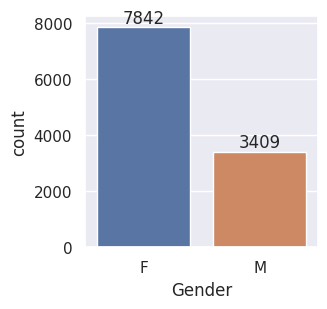

In [ ]:
#plotting  a bar chart for gender and it's count
sns.set(rc={'figure.figsize':(3,3)})
ax = sns.countplot(x ='Gender',data=df)

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

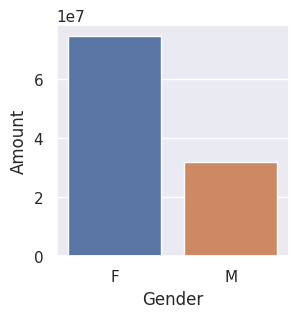

In [ ]:
# plotting a bar chart for gender vs total amount
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(3,3)})
sns.barplot(x = 'Gender', y= 'Amount' ,data = sales_gen)   

From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men.

**Age**

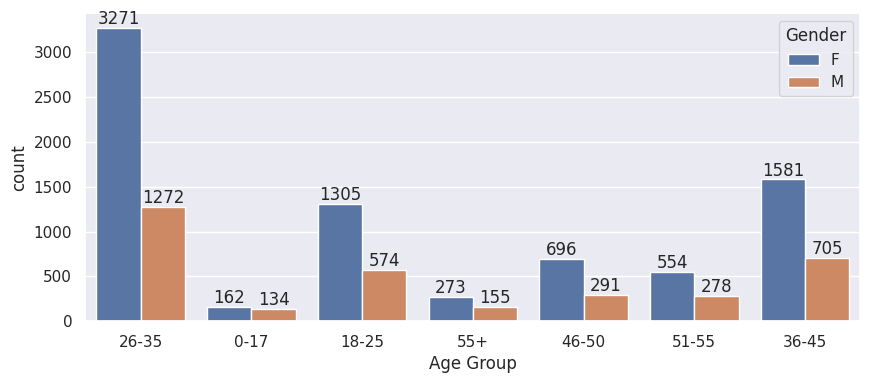

In [ ]:
sns.set(rc={'figure.figsize':(10,4)})
ax = sns.countplot(data=df,x ='Age Group', hue = 'Gender')

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

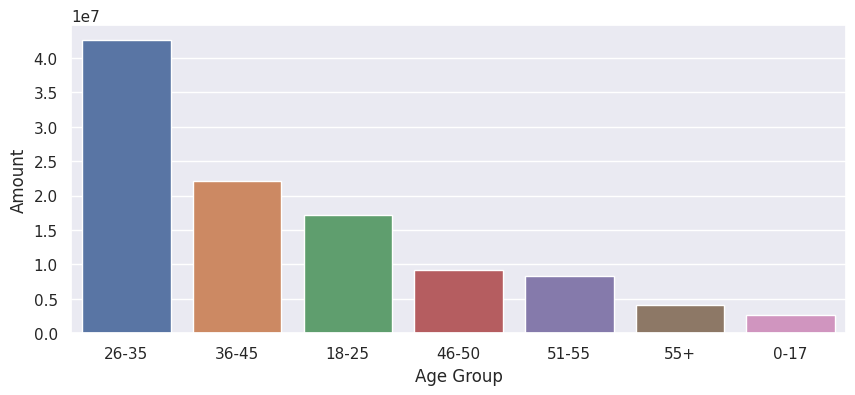

In [ ]:
#Total amount vs age group
sales_gen = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(10,4)})
sns.barplot(x = 'Age Group', y= 'Amount' ,data = sales_gen)

From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

**State**

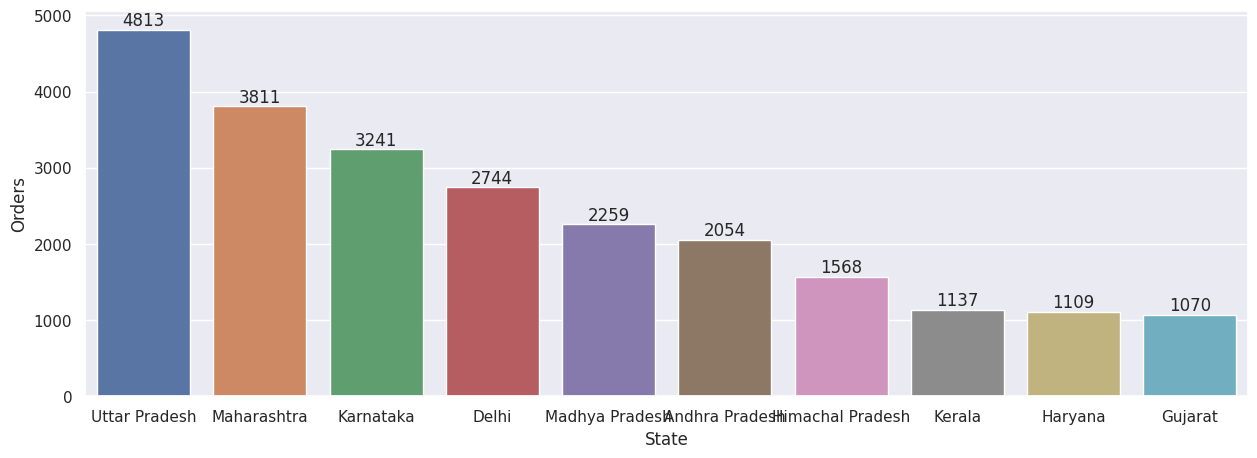

In [ ]:
#Total number of orders from top 10 states
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(x = 'State', y= 'Orders' ,data = sales_state)

for bars in ax.containers:
  ax.bar_label(bars)

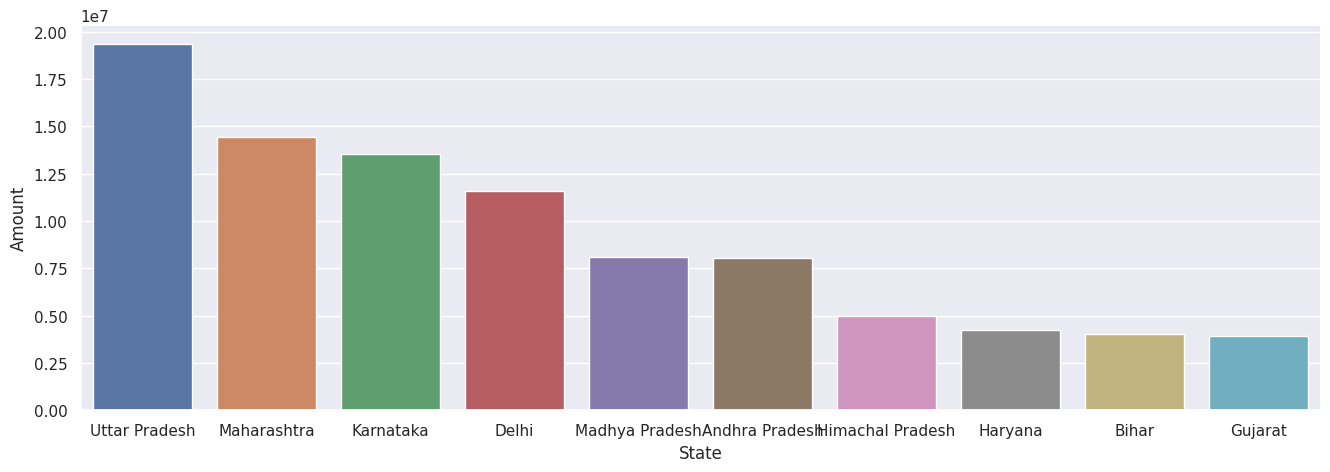

In [ ]:
#Total amount/sales from top 10 sates
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,5)})
ax = sns.barplot(x = 'State', y= 'Amount' ,data = sales_state)


From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh , Maharashtra and karnataka resceptively. 

**Marital Status**

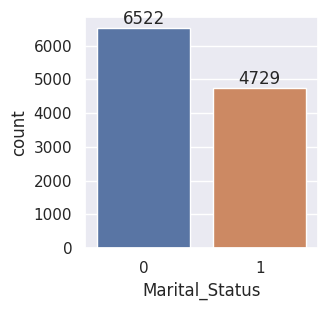

In [ ]:
sns.set(rc={'figure.figsize':(3,3)})
ax = sns.countplot(x ='Marital_Status',data=df)

for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

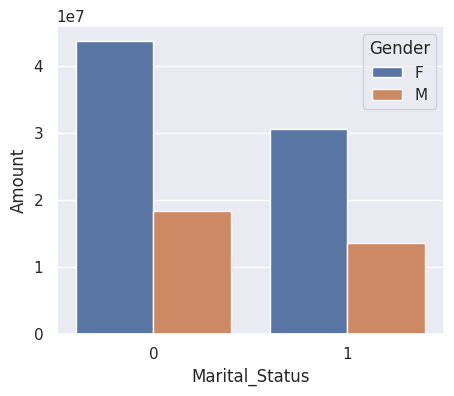

In [ ]:
sales_state = df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(5,4)})
sns.barplot(x = 'Marital_Status', y= 'Amount' ,data = sales_state, hue='Gender')


From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

**Occupation**

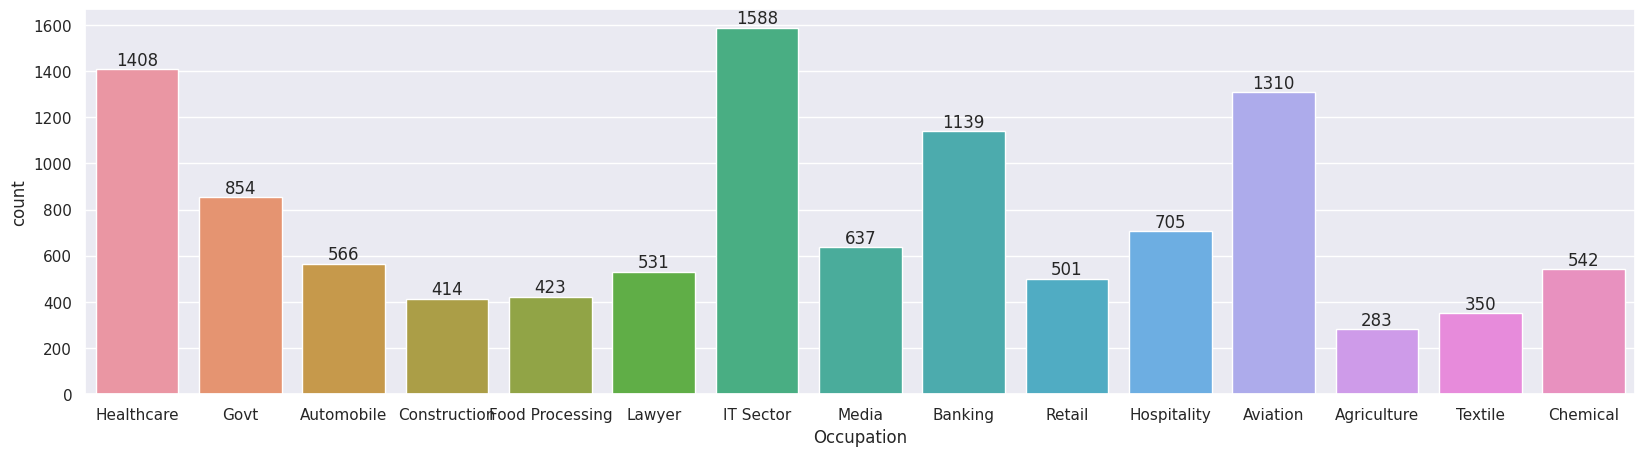

In [ ]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(x ='Occupation',data=df)

for bars in ax.containers:
  ax.bar_label(bars)

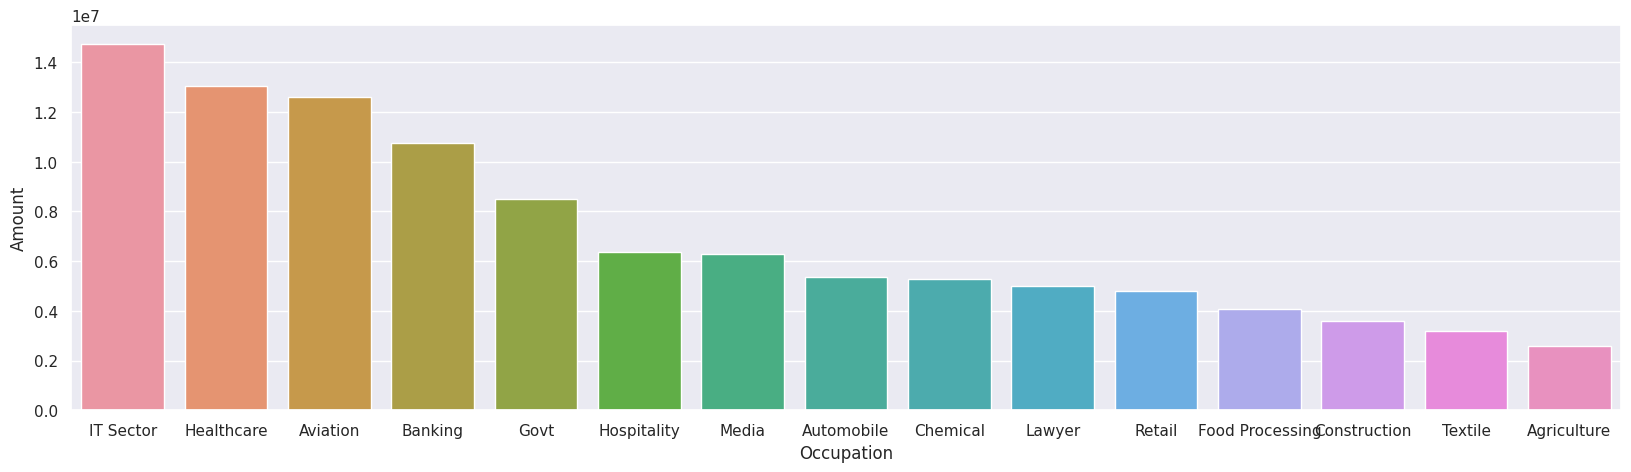

In [ ]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
ax = sns.barplot(x = 'Occupation', y= 'Amount' ,data = sales_state)


From above graphs we can see that most of the buyers are working in IT , Healthcare and Aviation sector

**Product Category**

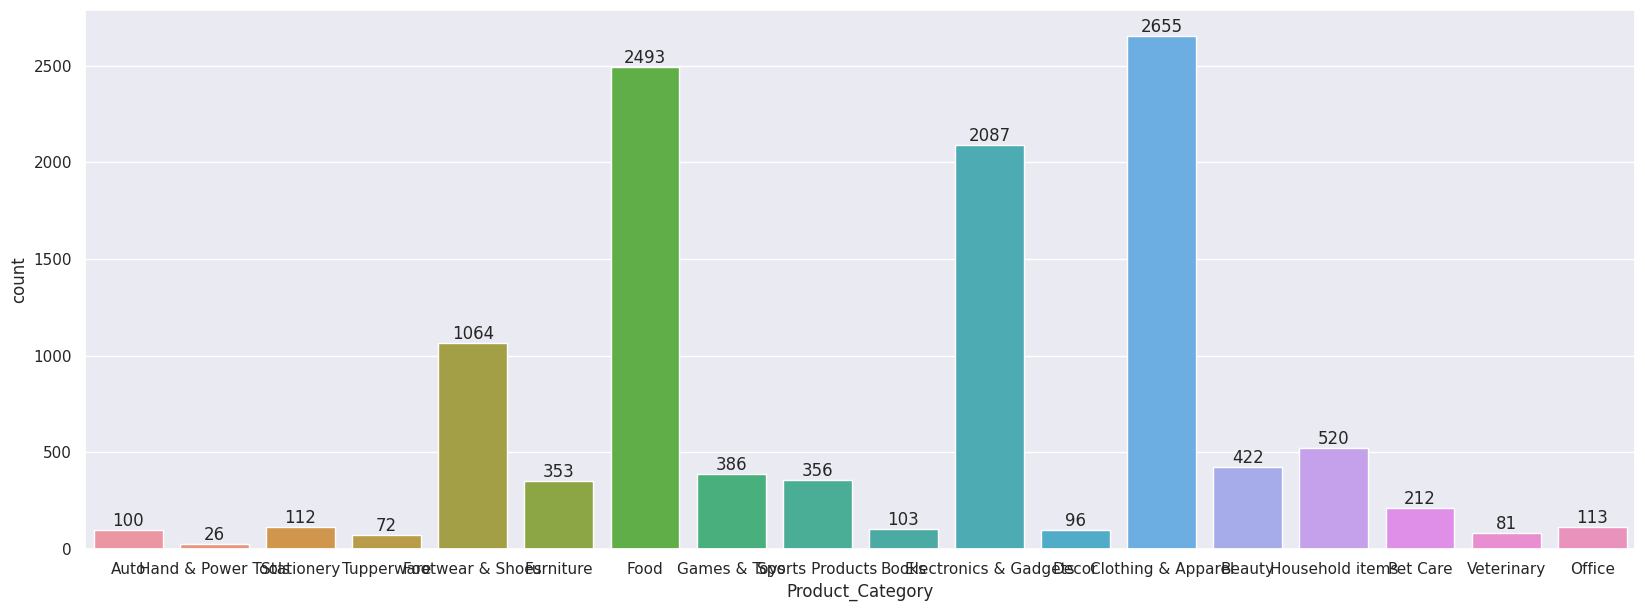

In [ ]:
sns.set(rc={'figure.figsize':(20,7)})
ax = sns.countplot(x ='Product_Category',data=df)

for bars in ax.containers:
  ax.bar_label(bars)

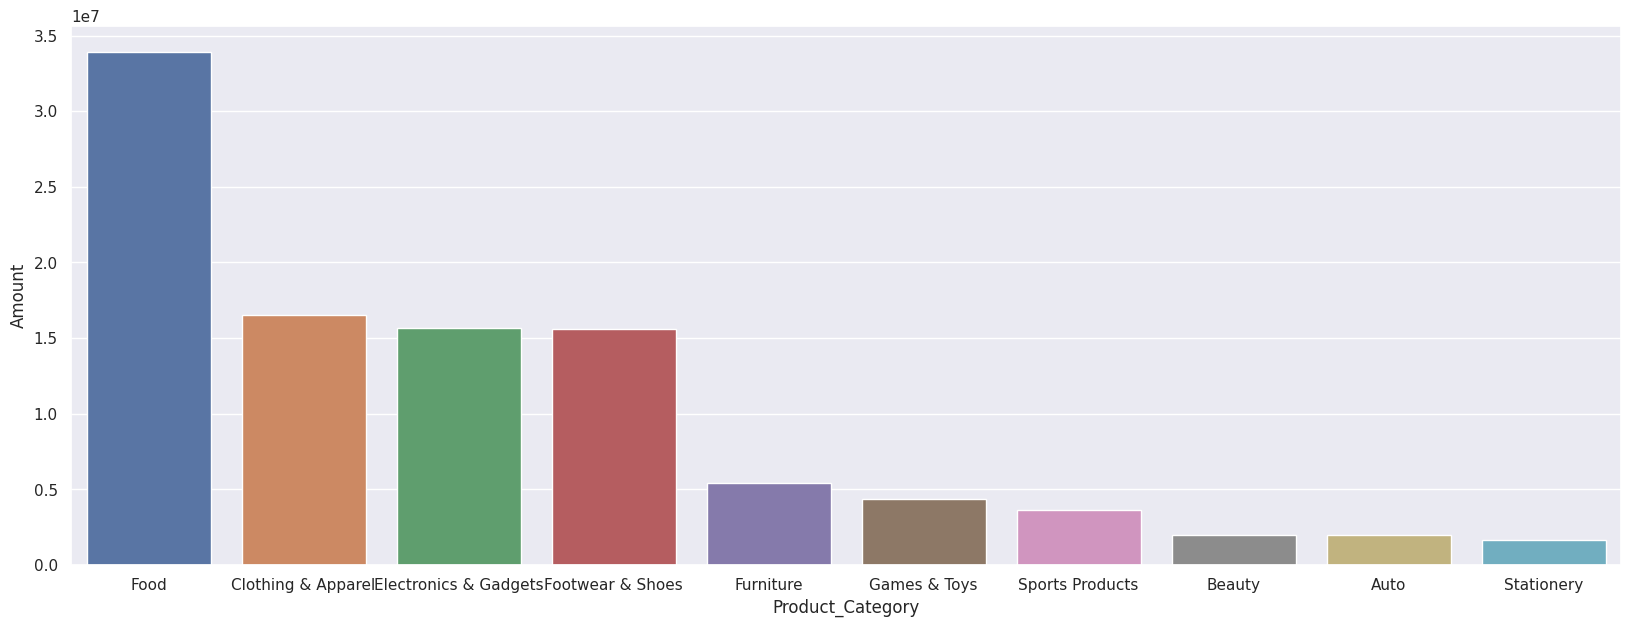

In [ ]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,7)})
ax = sns.barplot(x = 'Product_Category', y= 'Amount' ,data = sales_state)


From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

**Top Products**

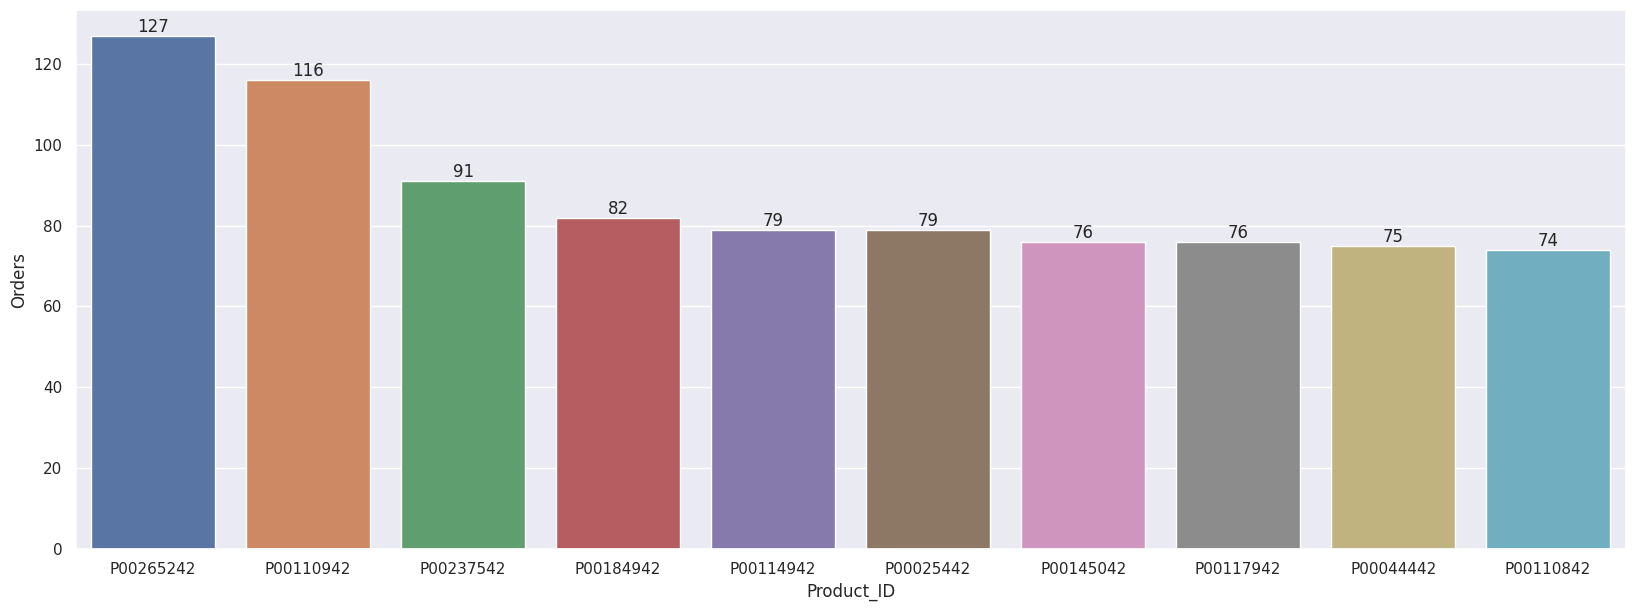

In [ ]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,7)})
ax = sns.barplot(x = 'Product_ID', y= 'Orders' ,data = sales_state)

for bars in ax.containers:
  ax.bar_label(bars)

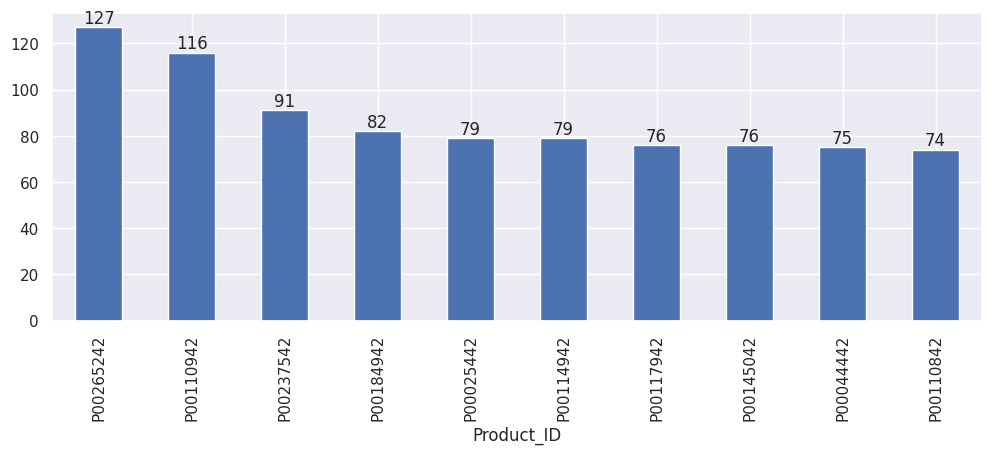

In [ ]:
#top 10 most sold products (same thing as above)
fig1, axl = plt.subplots(figsize=(12,4))
ax = df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

for bars in ax.containers:
  ax.bar_label(bars)

# **Conclusion:**

Married women age group 26-35 yrs from UP,Maharashtra and karnataka working in IT, Healthcare and Aviation are more likely to buy products from food, Clothing and Electronics category. 